<a href="https://colab.research.google.com/github/bwada10/MAT421---Computational-Methods/blob/main/ModuleH_ODE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 22 - Ordinary Differential Equation**

---

**22.4: Numerical Error and Instability**

**Accurary** and **stabiity** are two main issues in regards to integration for ODE's. *Accuracy* is the scheme's ability to get near to the exact solution, as a function of the step size $h$. *Stability* is the scheme's ability to keep the error from increasing after integrations. If error remains small then the scheme is stable, and unstable if the error grows.

---

> *Use the Euler Explicit method to solve the pendulum equation over the time interval $[0,5]$ in increments of $0.05$ and for an initial solution of $S_0 = \left[\begin{array}{c} 3\\0 \end{array}\right]$. For the model parameters using $\sqrt{\frac{g}{l}} = 6$.*



<ipython-input-13-124bf36357e2>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


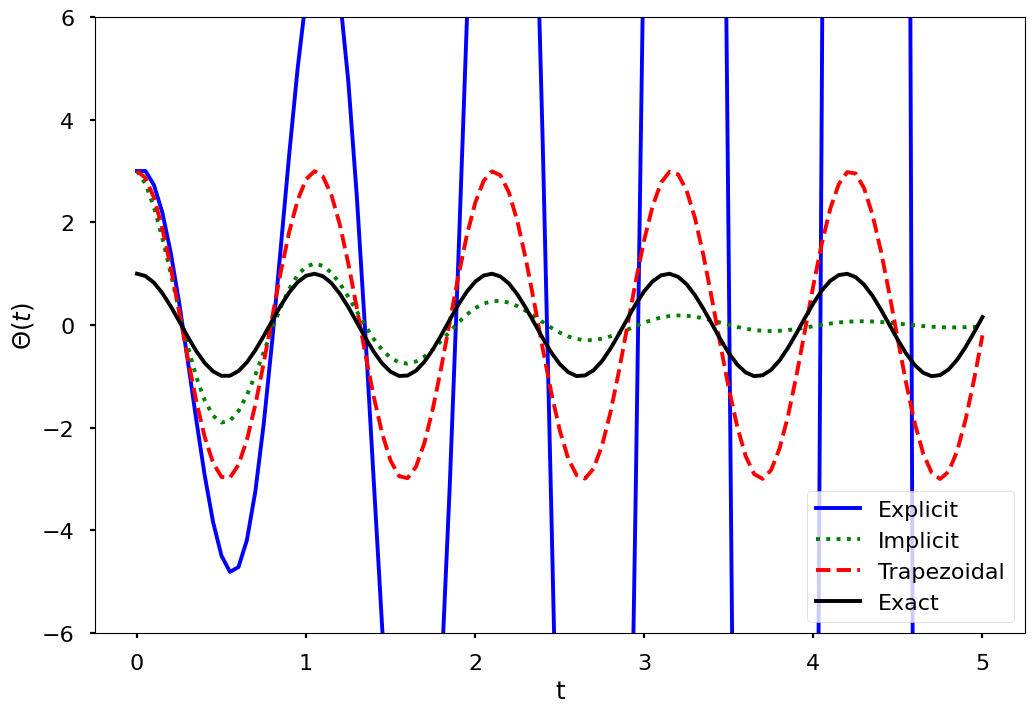

In [13]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

h = 0.05 #Step size
t = np.arange(0, 5.05, h)  #Grid
w = 6 #Oscillation
s0 = np.array([[3], [0]]) #Intial Solution

m_explicit = np.array([[1, h], 
               [-w**2*h, 1]])
m_implicit = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_trap = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_explicit = np.zeros((len(t), 2))
s_implicit = np.zeros((len(t), 2))
s_trap = np.zeros((len(t), 2))

# do integrations
s_explicit[0, :] = s0.T
s_implicit[0, :] = s0.T
s_trap[0, :] = s0.T

for j in range(0, len(t)-1):
    s_explicit[j+1, :] = np.dot(m_explicit,s_explicit[j, :])
    s_implicit[j+1, :] = np.dot(m_implicit,s_implicit[j, :])
    s_trap[j+1, :] = np.dot(m_trap,s_trap[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_explicit[:,0],'b-')
plt.plot(t,s_implicit[:,0],'g:')
plt.plot(t,s_trap[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-6, 6])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**22.5: Predictor-Corrector and Runge Kutta Methods**

**Predictor-corrector** improve the approximation accuracy of non-predicor-corrector methods. The predictor is an explicit formula and estimates the solution at $t_{j+1}$, we can use Euluer method here. After obtaining the solution $S(t_{j+1})$, we can apply the corrector to improve the accuracy.  

---

**Runge Kutta** methods are one of the most used methods for solving ODEs. Euler Method uses the first two terms in Taylor Series to approximate the numerical integration, but if we keep more terms of the series in then we can greatly improve the accuracy of numerical integration. Runge Kutta allows us to avoid deriving each expression in a series. 
> 

**22.6: Python ODE Solver**

In the *scipy* package, there is built-in functions for solving initial value problems. Utilizing Python functions, we can easily solve IVP without difficulty.

---

> *Consider the ODE $\frac{dS(t)}{dt}=\sin(t)$ for an initial value $S_0=0$. The exact solution is $S(t) = sin(t)$. Approximate the solution to this IVP over the interval $[0,π]$.*



<ipython-input-14-effa116fe9ba>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


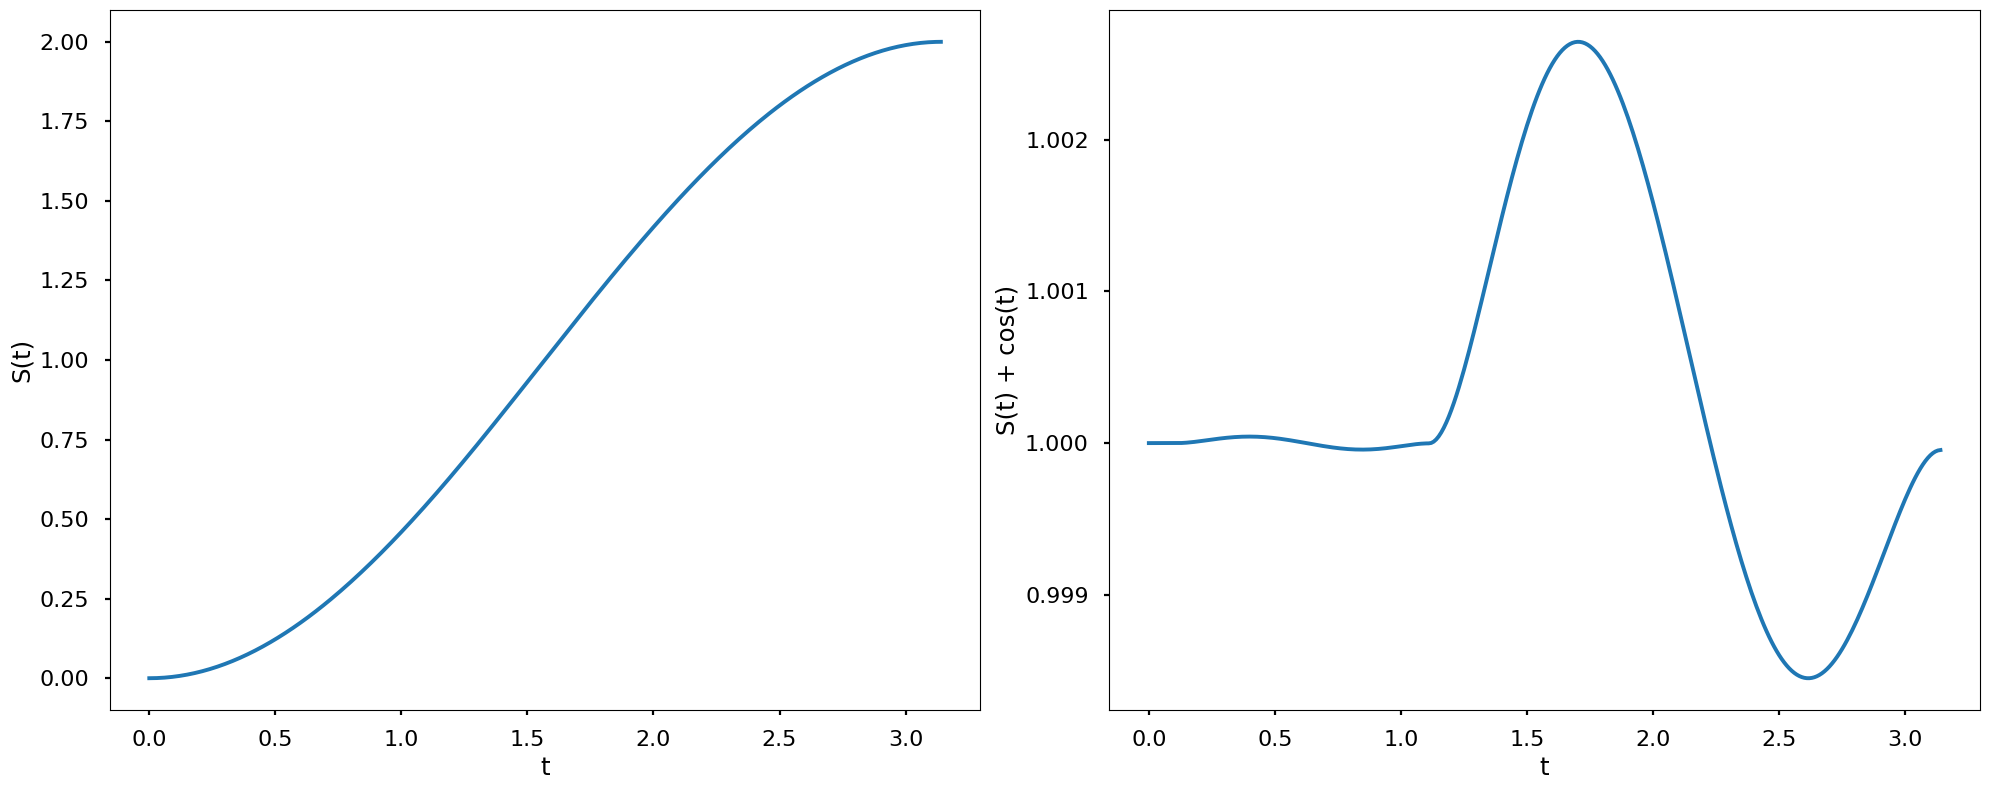

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

Fx = lambda t, st: np.sin(t)

t_eval = np.arange(0, np.pi, 0.01)
sol = solve_ivp(Fx, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] + np.cos(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) + cos(t)')
plt.tight_layout()
plt.show()